# Topic Modeling with NMF

*Referências:* 
[site](https://towardsdatascience.com/topic-modeling-articles-with-nmf-8c6b2a227a45#:~:text=Non%2DNegative%20Matrix%20Factorization%20(NMF,into%20a%20lower%2Ddimensional%20representation)
[github](https://github.com/robsalgado/personal_data_science_projects/tree/master/topic_modeling_nmf)

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Run the utilty functions from the seperate notebook
%run nlp_topic_utils.ipynb

### TODO Add your file path ###
file_path = './data/'
file_name = 'abstract_training.csv'

# Load the articles
df = pd.read_csv(file_path + file_name, encoding='iso 8859-2')
df.head()

title  date  \
0  Sinogram-based motion correction of PET images...  2002   
1  A fault tolerant control architecture for auto...  2000   
2  Fault tolerant memory design for HW/SW co-reli...  2003   
3  Efficient color correction approach for phase ...  2010   
4  High-performance line conditioner with output ...  2004   

                                                body  \
0  A head motion during brain imaging has been re...   
1  A hierarchical controller for dealing with fau...   
2  A highly dependable embedded fault-tolerant me...   
3  A highly efficient color correction approach b...   
4  A high-performance line conditioner with excel...   

                                                 url researcher  
0  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall  
1  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall  
2  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall  
3  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall  
4  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall

In [2]:
# Get the word count
df['word_count'] = df['body'].apply(word_count)
df['word_count'].mean()

141.16188752783964

In [3]:
# Process the text
df['processed_text'] = df['body'].apply(process_text)
df.head()

title  date  \
0  Sinogram-based motion correction of PET images...  2002   
1  A fault tolerant control architecture for auto...  2000   
2  Fault tolerant memory design for HW/SW co-reli...  2003   
3  Efficient color correction approach for phase ...  2010   
4  High-performance line conditioner with output ...  2004   

                                                body  \
0  A head motion during brain imaging has been re...   
1  A hierarchical controller for dealing with fau...   
2  A highly dependable embedded fault-tolerant me...   
3  A highly efficient color correction approach b...   
4  A high-performance line conditioner with excel...   

                                                 url researcher  word_count  \
0  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         128   
1  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall          89   
2  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         175   
3  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         189   
4  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         136   

                                      processed_text  
0  [head, motion, dure, brain, imag, recogn, sour...  
1  [hierarch, control, deal, fault, advers, envir...  
2  [high, depend, embed, fault-toler, memori, arc...  
3  [high, effici, color, correct, approach, base,...  
4  [high-perform, line, condition, excel, effici,...

In [4]:
# Descriptive statistics for word count
df['word_count'].describe()

count    14368.000000
mean       141.161888
std         55.031877
min          7.000000
25%        105.000000
50%        136.000000
75%        169.000000
max        751.000000
Name: word_count, dtype: float64

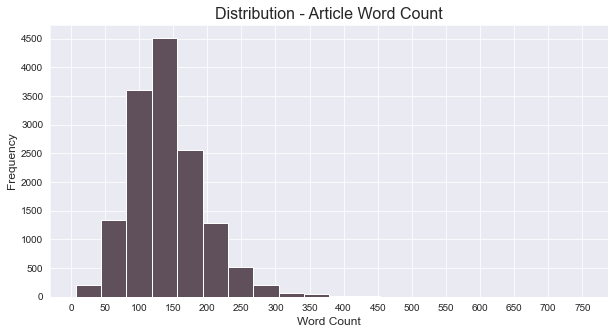

In [5]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 5000, 500))
plt.xticks(np.arange(0, 800, 50))

file_name = 'hist'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

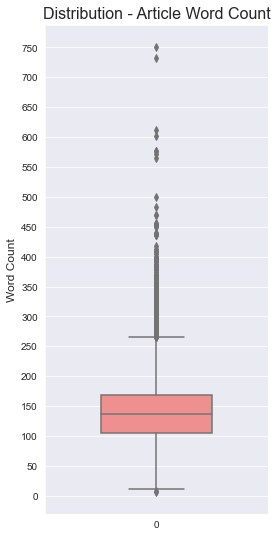

In [6]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    data=df['word_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)
plt.yticks(np.arange(0, 800, 50))

file_name = 'box_plot'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [7]:
# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

word  frequency
0       use      17288
1     fault      15266
2   softwar      13651
3     model      11718
4     paper      10471
5      test       9548
6    result       8114
7    propos       8068
8    method       8002
9      data       7545
10  perform       7438
11  develop       7386
12   detect       7297
13     base       7267
14    error       6858
15  present       6763
16  process       6520
17   applic       6500
18  qualiti       6292
19   design       6288

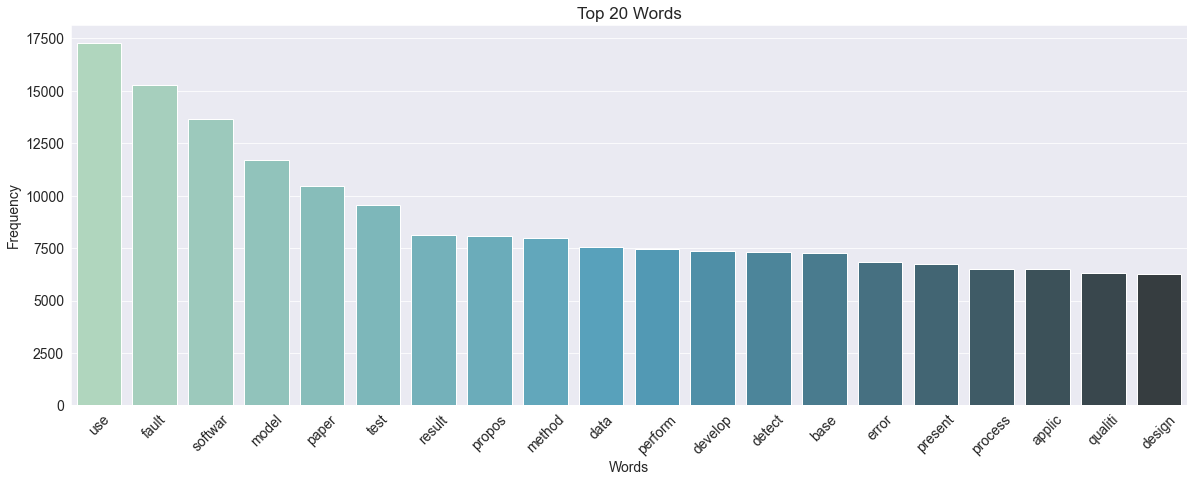

In [8]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

file_name = 'top_words'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [9]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

30806

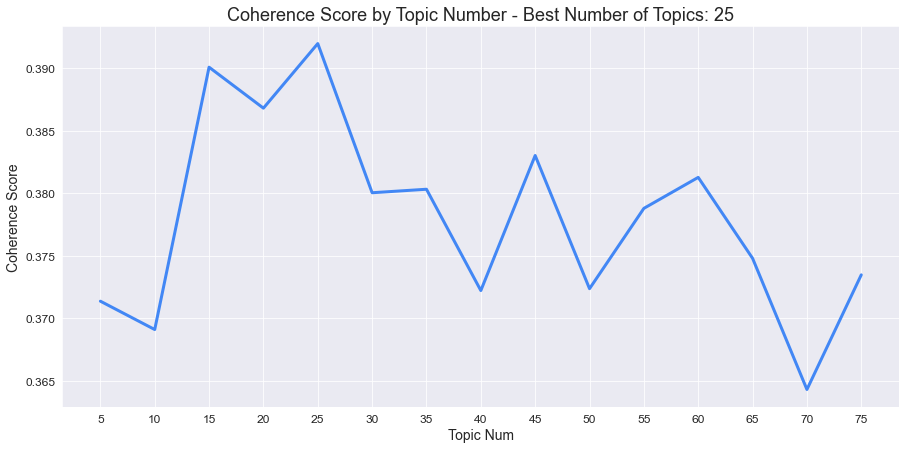

In [10]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_score'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [11]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [12]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 10

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

0            1             2            3           4          5  \
0  design      program          tool         code         bug   approach   
1   toler  fault toler         fault  architectur      redund   recoveri   
2    test    test case          case      generat     coverag  test suit   
3   error      correct  error detect         soft  soft error     detect   
4  servic          qos    web servic     composit      provid       grid   

                6            7             8           9  \
0     architectur      languag       analysi      specif   
1          applic        agent        mechan      replic   
2            suit     techniqu  softwar test      random   
3   error correct       method           bit  error rate   
4  qualiti servic  architectur         manag     resourc   

                                              topics  
0  design program tool code bug approach architec...  
1  toler fault architectur redund recoveri applic...  
2  test case generat coverag suit techniqu softwa...  
3          error correct detect soft method bit rate  
4  servic qos web composit provid grid qualiti ar...

In [13]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head()

topic_num                                             topics
0          0  design program tool code bug approach architec...
1          1  toler fault architectur redund recoveri applic...
2          2  test case generat coverag suit techniqu softwa...
3          3          error correct detect soft method bit rate
4          4  servic qos web composit provid grid qualiti ar...

In [14]:
# Creating a temp df with the url and topic num to join on
url = df['url'].tolist()

df_temp = pd.DataFrame({
    'url': url,
    'topic_num': docweights.argmax(axis=1)
})

# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)

# Merging with the original df
df_topics = pd.merge(
    df,
    merged_topic,
    on='url',
    how='left'
)

df_topics = df_topics.drop(
    'processed_text',
    axis=1
)

df_topics.head()

title  date  \
0  Sinogram-based motion correction of PET images...  2002   
1  A fault tolerant control architecture for auto...  2000   
2  Fault tolerant memory design for HW/SW co-reli...  2003   
3  Efficient color correction approach for phase ...  2010   
4  High-performance line conditioner with output ...  2004   

                                                body  \
0  A head motion during brain imaging has been re...   
1  A hierarchical controller for dealing with fau...   
2  A highly dependable embedded fault-tolerant me...   
3  A highly efficient color correction approach b...   
4  A high-performance line conditioner with excel...   

                                                 url researcher  word_count  \
0  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         128   
1  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall          89   
2  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         175   
3  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         189   
4  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall         136   

   topic_num                                             topics  
0         14  imag correct method color qualiti pixel use pe...  
1         20  control toler flow design oper scheme robot ac...  
2          1  toler fault architectur redund recoveri applic...  
3         14  imag correct method color qualiti pixel use pe...  
4         10  power voltag current simul circuit signal tran...

In [15]:
# Showing the 3 matrices we get witn nmf
A = tfidf_vectorizer.transform(texts)
W = nmf.components_
H = nmf.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1]))
print('W = {} x {}'.format(W.shape[0], W.shape[1]))
print('H = {} x {}'.format(H.shape[0], H.shape[1]))

A = 14368 x 5000
W = 25 x 5000
H = 14368 x 25


In [16]:
# Get the residuals for each document
r = np.zeros(A.shape[0])

for row in range(A.shape[0]):
    r[row] = np.linalg.norm(A[row, :] - H[row, :].dot(W), 'fro')

sum_sqrt_res = round(sum(np.sqrt(r)), 3)
'Sum of the squared residuals is {}'.format(sum_sqrt_res)

'Sum of the squared residuals is 13894.091'

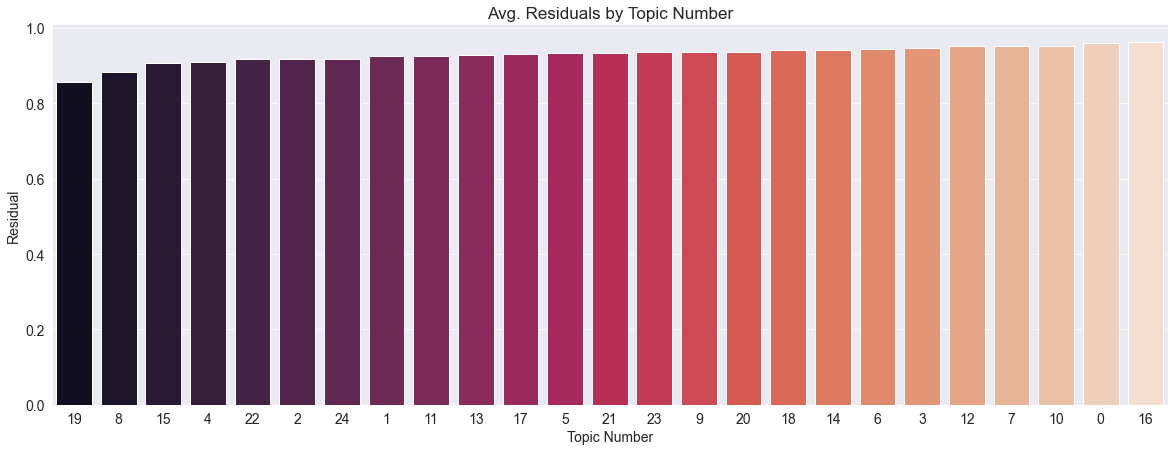

In [17]:
# Add the residuals to the df
df_topics['resid'] = r

# Get the avg residual by topic
resid_data = df_topics[[
    'topic_num',
    'resid'
]].groupby('topic_num').mean().sort_values(by='resid')

# Plot a bar chart for the avg. residuls by topic
fig = plt.figure(figsize=(20,7))

x = resid_data.index
y = resid_data['resid']
    
g = sns.barplot(
    x=x,
    y=y,
    order=x,
    palette='rocket'
)

g.set_xticklabels(
    g.get_xticklabels(),
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Topic Number', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.title('Avg. Residuals by Topic Number', fontsize=17)

file_name = 'avg_resid'

fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [19]:
# Predicting the topic for an unseen article

# Load the unseen articles for prediction
file_name = 'abstract_test.csv'

df_new = pd.read_csv(file_path + file_name, encoding='iso 8859-2')

# Process the text
df_new['processed_text'] = df_new['body'].apply(process_text)

new_texts = df_new['processed_text']

# Transform the new data with the fitted models
tfidf_new = tfidf_vectorizer.transform(new_texts)
X_new = nmf.transform(tfidf_new)

# Get the top predicted topic
predicted_topics = [np.argsort(each)[::-1][0] for each in X_new]

# Add to the df
df_new['pred_topic_num'] = predicted_topics

df_new

title  date  \
0     Image quality assessment: from error visibilit...  2004   
1     Atmospheric correction and oceanic constituent...  2005   
2     The Dangers of Failure Masking in Fault-Tolera...  2007   
3     Evaluating the Combined Effect of Vulnerabilit...  2007   
4     Improving Classification Efficiency of Orthogo...  2009   
...                                                 ...   ...   
6762  A structured team building method for collabor...  2013   
6763  Key Issues Regarding Digital Libraries:Evaluat...  2013   
6764  The design of polynomial function-based neural...  2013   
6765  Balancing Privacy and Utility in Cross-Company...  2013   
6766  Software fault prediction metrics: A systemati...  2013   

                                                   body  \
0     Objective methods for assessing perceptual ima...   
1     Ocean color sensors on board satellite measure...   
2     On 1 August 2005, a Boeing Company 777-200 air...   
3     On large and complex distributed systems hardw...   
4     Orthogonal defect classification (ODC) is a ki...   
...                                                 ...   
6762  The traditional crowdsourcing approach consist...   
6763  This is the second book based on the 5S (Socie...   
6764  In this study, we introduce a design methodolo...   
6765  Background: Cross-company defect prediction (C...   
6766  ContextSoftware metrics may be used in fault p...   

                                                    url researcher  \
0     http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall   
1     http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall   
2     http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall   
3     http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall   
4     http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...       Hall   
...                                                 ...        ...   
6762  http://ieeexplore.ieee.org/stamp/stamp.jsp?arn...     Wahono   
6763  http://ieeexplore.ieee.org/xpl/ebooks/bookPdfW...     Wahono   
6764  https://www.researchgate.net/profile/Byoung-Ju...     Wahono   
6765       http://ieeexplore.ieee.org/document/6419712/     Wahono   
6766  http://romisatriawahono.net/lecture/rm/survey/...     Wahono   

                                         processed_text  pred_topic_num  
0     [object, method, assess, perceptu, imag, quali...              14  
1     [ocean, color, sensor, board, satellit, measur...              24  
2     [august, boe, compani, aircraft, oper, intern,...              21  
3     [larg, complex, distribut, hardwar, softwar, f...              22  
4     [orthogon, defect, classif, odc, kind, defect,...              11  
...                                                 ...             ...  
6762  [tradit, crowdsourc, approach, consist, open, ...              16  
6763  [second, book, base, societi, scenario, space,...              16  
6764  [studi, introduc, design, methodolog, polynomi...               5  
6765  [background, cross-compani, defect, predict, c...              12  
6766  [contextsoftwar, metric, use, fault, predict, ...              13  

[6767 rows x 7 columns]

In [20]:
# Join with the original df to get the topic summary
df_new = pd.merge(
    df_new.drop('processed_text', axis=1),
    df_topics[['topic_num', 'topics']],
    left_on='pred_topic_num',
    right_on='topic_num',
    how='inner' 
).drop_duplicates().drop(['topic_num', 'url', 'date'], axis=1)



In [21]:
pd.set_option('display.max_colwidth', None)
df_new


title  \
0                                                           Image quality assessment: from error visibility to structural similarity   
600      Analysis of the impact of CT based attenuation correction, scatter compensation and 3D-beam modeling on SPECT image quality   
1200                                                   Inverse wave field extrapolation: a different NDI approach to imaging defects   
1800                                                 Modeling range images with bounded error triangular meshes without optimization   
2400                                              Temperature Correction of PSP Measurement for Low-Speed Flow Using Infrared Camera   
...                                                                                                                              ...   
4519503                                                 Fault-Prone Module Prediction Using a Prediction Model and Manual Inspection   
4520121                                                     Evaluating Performance of Network Metrics for Bug Prediction in Software   
4520739                                                        Predict fault-prone classes using the complexity of UML class diagram   
4521357                                       Aspect Oriented Software metrics based maintainability assessment: Framework and model   
4521975                                                            Software fault prediction metrics: A systematic literature review   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Objective methods for assessing perceptual image quality traditionally attempted to quantify the visibility of errors (difference